In [1]:
#Import the basic libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\midhu\Desktop\COH_COSF_BA\python files\regression\ad.csv",index_col=0)
data    

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
data.shape

(200, 4)

In [34]:
data.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [5]:
data.tail(5)

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [39]:
data[160:163]

,TV,radio,newspaper,sales
161,172.5,18.1,30.7,14.4
162,85.7,35.8,49.3,13.3
163,188.4,18.1,25.6,14.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#swapping rows and columns use transpose()
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
correlation= data.corr()
correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

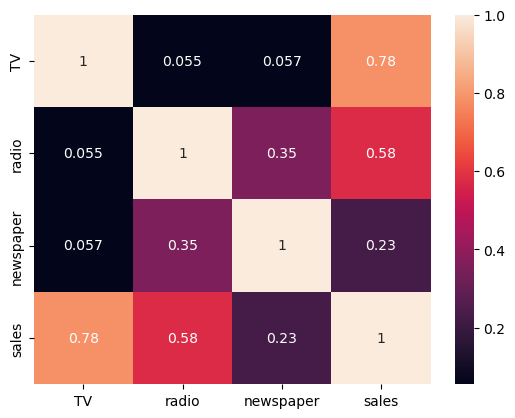

In [10]:
sns.heatmap(correlation,annot=True)

<AxesSubplot:xlabel='TV', ylabel='sales'>

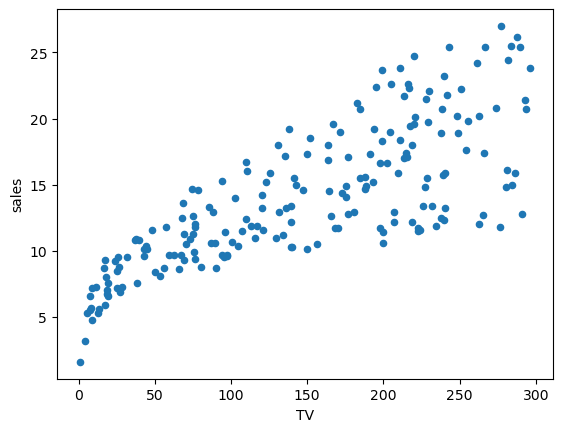

In [11]:
data.plot(kind = 'scatter',x='TV',y='sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

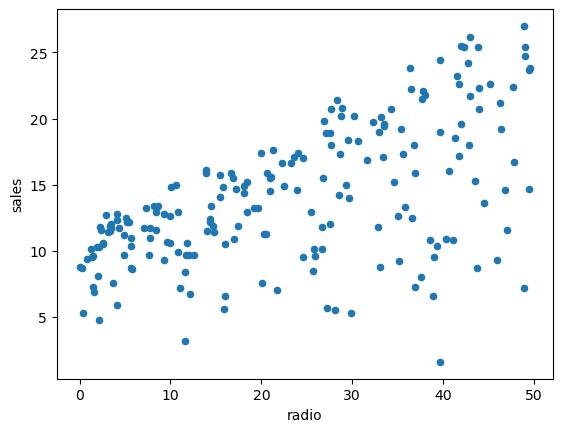

In [12]:
data.plot(kind = 'scatter',x='radio',y='sales')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

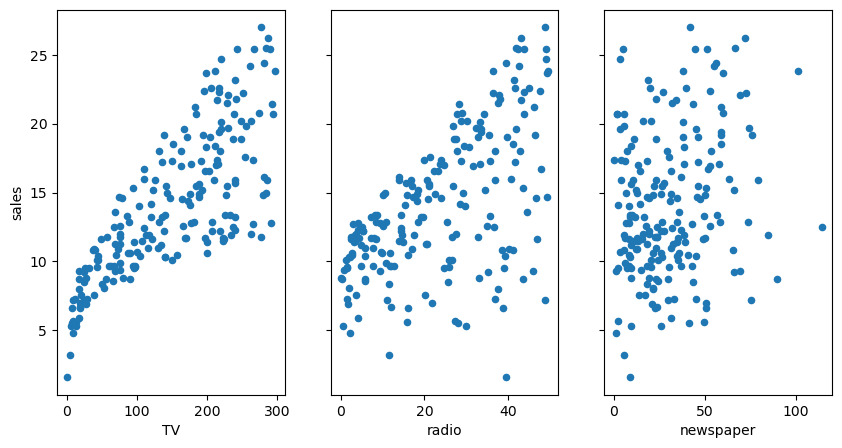

In [13]:
fig, axs = plt.subplots(1,3, sharey = True)
# This line creates a figure (fig) and three subplots (axs). 
# The 1 indicates there will be one row of subplots, and the 3 indicates there will be three subplots horizontally. 
# sharey=True ensures that all subplots share the same y-axis.
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(10, 5)) #the first subplot (axs[0])
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

# Model Building

In [14]:
# Model Building - Regression using SK learn Library (SciKit-learn)

from sklearn.model_selection import train_test_split

In [15]:
# Train-test split is a method used to evaluate the performance of a machine learning model. 
# It involves dividing our dataset into two parts: a training set and a testing set.

In [16]:
# declare the X and Y variables for prediction 
x=data[["TV","radio","newspaper"]] #independent variable(Predictors)
y=data[["sales"]] #Dependent Variable(Target)

In [17]:
#spilt the dataset
x_train, x_test , y_train, y_test = train_test_split( x, y , test_size=0.2)
y_test

,sales
163,14.9
114,15.9
84,13.6
89,12.9
145,11.4
59,23.8
111,13.4
10,10.6
144,10.4
110,19.8


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr=LinearRegression()

In [20]:
#.fit(): This is a method used to train the model
lr.fit(x,y)

LinearRegression()

In [21]:
#Return the R-squared/coefficient of determination of the prediction.
lr.score(x,y)

0.8972106381789522

In [22]:
#To identify the coefficient
lr.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [24]:
#to identify the intercept value
lr.intercept_

array([2.93888937])

In [23]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][idx]))

The coefficient for TV is 0.04576464545539761
The coefficient for radio is 0.18853001691820453
The coefficient for newspaper is -0.00103749304247629


In [25]:
tv=150
radio= 75
newspaper =20
#What is sales?

In [69]:
lr.predict([[150,75,20]])
#using [[ ]] twice, you're essentially formatting your input data in the correct shape expected by the predict method of the linear regression model

C:\Users\midhu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[23.9225876]])

In [70]:
lr.predict(np.array([[300,75,10]]))

C:\Users\midhu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[30.79765934]])

# Evaluating Model matrix

In [71]:
#Use your trained model to make predictions on the test dataset.
y_pred = lr.predict(x_test)
print(x_test)
y_pred  

        TV  radio  newspaper
163  188.4   18.1       25.6
114  209.6   20.6       10.7
84    68.4   44.5       35.6
89    88.3   25.5       73.4
145   96.2   14.8       38.9
59   210.8   49.6       37.7
111  225.8    8.2       56.5
10   199.8    2.6       21.2
144  104.6    5.7       34.4
110  255.4   26.9        5.5
177  248.4   30.2       20.3
141   73.4   17.0       12.9
192   75.5   10.8        6.0
55   262.7   28.8       15.9
147  240.1    7.3        8.7
9      8.6    2.1        1.0
34   265.6   20.0        0.3
164  163.5   36.8        7.4
80   116.0    7.7       23.1
5    180.8   10.8       58.4
119  125.7   36.9       79.2
175  222.4    3.4       13.1
130   59.6   12.0       43.1
97   197.6    3.5        5.9
113  175.7   15.4        2.4
148  243.2   49.0       44.3
120   19.4   16.0       22.3
54   182.6   46.2       58.7
200  232.1    8.6        8.7
38    74.7   49.4       45.7
117  139.2   14.3       25.6
8    120.2   19.6       11.6
60   210.7   29.5        9.3
151  280.7   1

array([[14.94678206],
       [16.40377623],
       [14.42184212],
       [11.71127101],
       [10.09133403],
       [21.89805198],
       [14.7598741 ],
       [12.55084872],
       [ 8.76480262],
       [19.69293106],
       [19.9793727 ],
       [ 9.48964097],
       [ 8.42401933],
       [20.37443008],
       [15.29422368],
       [ 3.72734086],
       [18.86426829],
       [17.35163608],
       [ 9.67530328],
       [13.18867186],
       [15.56609348],
       [13.74435742],
       [ 7.88410649],
       [12.63571716],
       [13.88060985],
       [23.26086103],
       [ 6.82006767],
       [19.94469957],
       [15.17319554],
       [15.62347779],
       [11.97874744],
       [12.12295317],
       [18.13348698],
       [18.36720534],
       [21.7226299 ],
       [12.77458802],
       [ 6.12602215],
       [13.87595844],
       [ 9.90868103],
       [19.15639616]])

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

1.6133892178195182
0.9256827802435734


In [50]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.2701925908379084